In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install statsmodels
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: "%.5f" % x)

**Data Understanding & Preparation**

In [2]:
df = pd.read_excel("/kaggle/input/abtesting/ab_testing.xlsx", sheet_name="Control Group")
df_control = df.copy()

df_ = pd.read_excel("/kaggle/input/abtesting/ab_testing.xlsx", sheet_name="Test Group")
df_test = df_.copy()

# Adım 2: Kontrol ve test grubu verilerini analiz ediniz.

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head())
    print("##################### Tail #####################")
    print(dataframe.tail())
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    print("##################### Quantiles T #####################")
    print(dataframe.describe().T)

check_df(df_control)
check_df(df_test)

##################### Shape #####################
(40, 4)
##################### Types #####################
Impression    float64
Click         float64
Purchase      float64
Earning       float64
dtype: object
##################### Head #####################
    Impression      Click  Purchase    Earning
0  82529.45927 6090.07732 665.21125 2311.27714
1  98050.45193 3382.86179 315.08489 1742.80686
2  82696.02355 4167.96575 458.08374 1797.82745
3 109914.40040 4910.88224 487.09077 1696.22918
4 108457.76263 5987.65581 441.03405 1543.72018
##################### Tail #####################
     Impression      Click  Purchase    Earning
35 132064.21900 3747.15754 551.07241 2256.97559
36  86409.94180 4608.25621 345.04603 1781.35769
37 123678.93423 3649.07379 476.16813 2187.72122
38 101997.49410 4736.35337 474.61354 2254.56383
39 121085.88122 4285.17861 590.40602 1289.30895
##################### NA #####################
Impression    0
Click         0
Purchase      0
Earning       0
dtype: int6

**Correlation**

<Axes: xlabel='Click', ylabel='Purchase'>

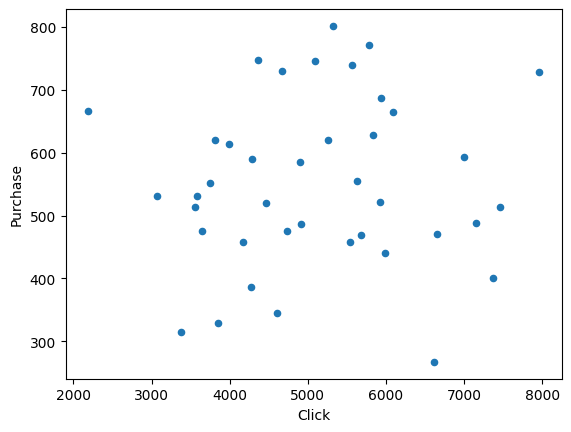

In [3]:
df_control["Click"].corr(df_control["Purchase"]) #0.057
df_control.plot.scatter("Click", "Purchase")

**Concatenate DataFrames**

In [4]:
df_control['Group'] = 'Control'
df_test['Group'] = 'Test'
df = pd.concat([df_control, df_test], axis=0, ignore_index=False)
df.head()

,Impression,Click,Purchase,Earning,Group
0,82529.45927,6090.07732,665.21125,2311.27714,Control
1,98050.45193,3382.86179,315.08489,1742.80686,Control
2,82696.02355,4167.96575,458.08374,1797.82745,Control
3,109914.40040,4910.88224,487.09077,1696.22918,Control
4,108457.76263,5987.65581,441.03405,1543.72018,Control


**A/B Test Hypothesis**

In [5]:
## Is There a Statistically Significant Difference Between the 
## Purchase Averages of the Control and Test Groups?

#H0: M1 = M2 - There is no difference between the purchase averages of the two groups.
#H1: M1 != M2 - There is a difference.


#Step 2: Analysis of the purchase averages for the control and test groups.

print(df.groupby("Group").agg({"Purchase": "mean"}))

         Purchase
Group            
Control 550.89406
Test    582.10610


In [6]:
# Normality Test

# H0: M1 = M2 (data follows a normal distribution)
# H1: M1 != M2 (data do not follow a normal distribution)

test_stat, pvalue = shapiro(df.loc[df["Group"] == "Control", "Purchase"])
print('Test stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
# p-value = 0.58 - H0 can not rejected, data follows a normal distribution
# Control group data follows a normal distribution

test_stat, pvalue = shapiro(df.loc[df["Group"] == "Test", "Purchase"])
print('Test stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
# p-value = 0.15 - H0 can not rejected, data follows a normal distribution
# Test group data follows a normal distribution


# Variance Homogeneity
# H0: M1 = M2 (Variances are homogenous)
# H1: (not homogenous)
test_stat, pvalue = levene(df.loc[df["Group"] == "Control", "Purchase"], df.loc[df["Group"] == "Test", "Purchase"])
print('Test stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
# p-value = 0.1083 - H0 can not rejected, Variances are homogenous
# The values of the Control and Test groups satisfy the homogeneity of variance assumption.

Test stat = 0.9773, p-value = 0.5891
Test stat = 0.9589, p-value = 0.1541
Test stat = 2.6393, p-value = 0.1083


**A/B Testing - Two Sample Unpaired T Test**

In [7]:
test_stat, pvalue = ttest_ind(df.loc[df["Group"] == "Control", "Purchase"],
                              df.loc[df["Group"] == "Test", "Purchase"],
                              equal_var=True)
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

# # HO can not rejected, There is no statistically significant difference between the purchase means of the control and test groups.

Test Stat = -0.9416, p-value = 0.3493


**Provide Recommendations Based on the Test Results:**


*Since the test duration is only one month, it could be extended to collect more data and perform additional analyses.*

*The sample size of 40 observations seems low; therefore, increasing the number of observations could provide more robust results.*